In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
metadata = pd.read_csv(r"C:\Users\Hp\00000000000000 Defence\full_metadata.csv")
metadata.sample(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9176\2753292946.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(r"C:\Users\Hp\00000000000000 Defence\full_metadata.csv")


,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
482020,s640927055,p02741,u869501198,1584241997,C,C (GCC 5.4.1),c,Runtime Error,97.0,128.0,324,NaN
523691,s432992097,p02865,u391247609,1586913703,C,C (GCC 5.4.1),c,Wrong Answer,1.0,128.0,165,NaN
252810,s598496300,p02391,u007599122,1491801367,C,C,c,Wrong Answer,0.0,596.0,196,0/4
386797,s285841273,p02572,u544731670,1599063980,C,C (GCC 9.2.1),c,Wrong Answer,38.0,4852.0,401,NaN
56220,s174180754,p00093,u694718044,1495863903,C,C,c,Runtime Error,0.0,600.0,612,0/1
143584,s713938860,p02258,u382730661,1461991437,C,C,c,Wrong Answer,0.0,600.0,628,29/40
526995,s289055809,p02881,u732141060,1572823828,C,C (GCC 5.4.1),c,Wrong Answer,2103.0,128.0,207,NaN
82522,s708020625,p00435,u142816770,1353897780,C,C,c,Wrong Answer,0.0,536.0,316,0/1
404617,s414725822,p02623,u139965353,1595011865,C,C (GCC 9.2.1),c,Compile Error,NaN,NaN,730,NaN
38088,s821674993,p00022,u933965697,1439774359,C,C,c,Wrong Answer,0.0,600.0,486,0/1


In [3]:
correct_filtered_df = pd.DataFrame()
bug_filtered_df = pd.DataFrame()

In [4]:
def read_code_file(problem_id, submission_id):
    with open("D:\\defence_data\\Project_CodeNet\\data\\{}\\C\\{}.c"
              .format(problem_id, submission_id),encoding="utf8") as f:
        return f.read()

In [5]:
metadata.index.size

754058

In [6]:
count1 = 0
count2 = 0
max_difference = 30
indexes = metadata.index

for i in indexes[0:5000]:   # for entire dataset change this to----- for i in indexes[0:-1]:
    problem_id = metadata["problem_id"][i]
    if(metadata["status"][i] == "Runtime Error"):
        bug_submission_id = metadata["submission_id"][i]
        bug_filtered_df = pd.concat([bug_filtered_df, pd.DataFrame(
            {
                "code": read_code_file(problem_id, bug_submission_id),
                "labels": 1
            },
            index=[count1])])
        count1 += 1
    if(metadata["status"][i] == "Accepted"):
        correct_submission_id = metadata["submission_id"][i]
        correct_filtered_df = pd.concat([correct_filtered_df, pd.DataFrame(
            {
                "code": read_code_file(problem_id, correct_submission_id),
                "labels": 0,
            },
            index=[count2])])
        count2 += 1
        
print(count1)
print(count2)

397
2167


In [7]:
# transformer_fine_tune_df = correct_filtered_df.iloc[396:]
# transformer_fine_tune_df

In [8]:
# correct_filtered_df.drop(correct_filtered_df.index[396:],inplace=True)

In [9]:
correct_filtered_df

,code,labels
0,"#include<stdio.h>\n\nint main(){\n int i,j;\n...",0
1,"#include<stdio.h>\nint main()\n{\n int i,j;...",0
2,"#include<stdio.h>\nint main()\n{\n int i,a,...",0
3,"#include<stdio.h>\nint main()\n{\n int n,i;...",0
4,"#include<stdio.h>\nint main ()\n{\n int i,j;\n...",0
...,...,...
2162,"#include<stdio.h>\nint main(void){\n\tint i,j,...",0
2163,#include <stdio.h> ...,0
2164,#include <stdio.h>\n\nint main(void){\n\tint h...,0
2165,#include<stdio.h>\nint main(void)\n{\n int ...,0


In [10]:
bug_filtered_df

,code,labels
0,"#include <stdio.h>\nvoid main()\n{\n int j,i...",1
1,j;main(i){for(;j=i<10;i++)for(;j<10;j++)printf...,1
2,"j;main(i){for(;j=i<10;i++)for(;j<10;)printf(""%...",1
3,"j;main(i){for(;j=i<10;i++)for(;j<10;)printf(""%...",1
4,#include <stdio.h>\n\nint main(void){\n int i...,1
...,...,...
392,"#include<stdio.h>\n\nint main(void){\nint i,j,...",1
393,"#include<stdio.h>\nmain()\n{\n\tint i,j,m[10];...",1
394,"#include <stdio.h>\n\nint main(int argc, const...",1
395,#include <stdio.h>\nint main ()\n{\n int nu...,1


In [11]:
# fine_tune_data = transformer_fine_tune_df['code']
# fine_tune_data

In [12]:
final_df = pd.concat([correct_filtered_df,bug_filtered_df],axis=0)
final_df

,code,labels
0,"#include<stdio.h>\n\nint main(){\n int i,j;\n...",0
1,"#include<stdio.h>\nint main()\n{\n int i,j;...",0
2,"#include<stdio.h>\nint main()\n{\n int i,a,...",0
3,"#include<stdio.h>\nint main()\n{\n int n,i;...",0
4,"#include<stdio.h>\nint main ()\n{\n int i,j;\n...",0
...,...,...
392,"#include<stdio.h>\n\nint main(void){\nint i,j,...",1
393,"#include<stdio.h>\nmain()\n{\n\tint i,j,m[10];...",1
394,"#include <stdio.h>\n\nint main(int argc, const...",1
395,#include <stdio.h>\nint main ()\n{\n int nu...,1


In [13]:
final_df = final_df.sample(frac=1).reset_index(drop=True)#USED FOR SHUFFLE

In [14]:
final_df

,code,labels
0,i;main(j){for(i=1;i<=9;i++)for(j=1;j<=9;j++)pr...,1
1,"#include<stdio.h>\nint main(void){\n int a,...",0
2,"main(a,b){for(;a<10;a++){for(b=1;b<10;){printf...",0
3,#include<stdio.h>\nint main(void){\n int ii =...,0
4,"#include<stdio.h>\n\nint main(){\n\t\n\tint i,...",0
...,...,...
2559,"#include <stdio.h>\nint main()\n{\n int i,n;\...",0
2560,"#include <stdio.h>\n\nint main() {\n\tint i, j...",0
2561,#include <stdio.h>\n\nint main(void) {\nint i ...,0
2562,"#include <stdio.h>\nint main(void){\n\tint i, ...",0


In [26]:
import transformers
import tensorflow as tf
import pandas as pd

C:\Users\Hp\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
aaa = final_df['code'].apply(lambda x: len(x.split()))

In [28]:
aaa.value_counts().max()

266

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='code', ylabel='Density'>

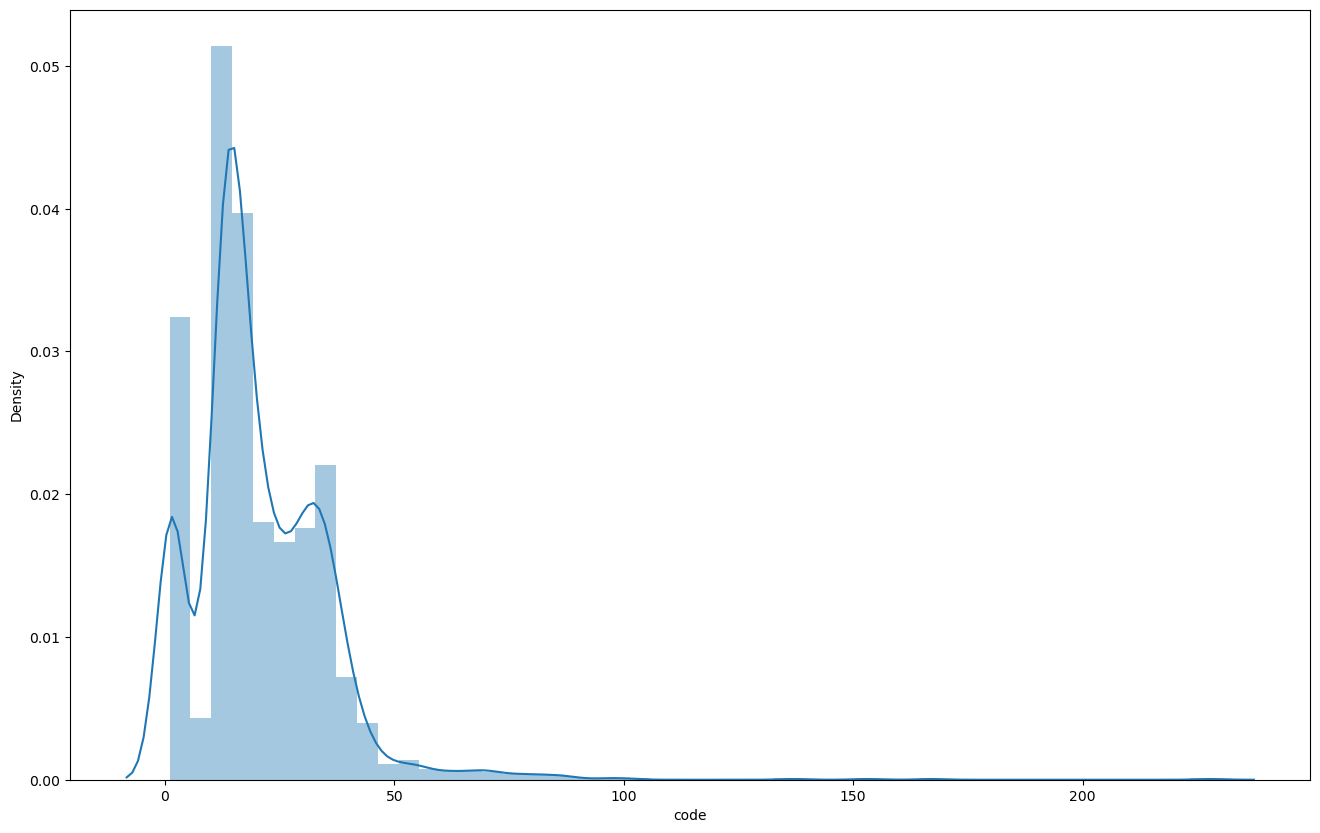

In [31]:
plt.figure(figsize=(16,10))
sns.distplot(aaa)

In [32]:
# Prepare the data for BERT input
MAX_LEN = 256
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")

In [33]:
train_data = []

In [34]:
for text, label in zip(final_df.code.values, final_df.labels.values):
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=MAX_LEN, truncation=True)
    attention_mask = [1] * len(input_ids)
    train_data.append((input_ids, attention_mask, label))

In [35]:
# Unpack the data
train_data = [
    (
        tf.constant(input_ids, dtype=tf.int32), 
        tf.constant(attention_mask, dtype=tf.int32), 
        tf.constant(label, dtype=tf.int32)
    ) 
    for input_ids, attention_mask, label in train_data
]

In [49]:
train_data[0]

(<tf.Tensor: shape=(65,), dtype=int32, numpy=
 array([ 101, 1045, 1025, 2364, 1006, 1046, 1007, 1063, 2005, 1006, 1045,
        1027, 1015, 1025, 1045, 1026, 1027, 1023, 1025, 1045, 1009, 1009,
        1007, 2005, 1006, 1046, 1027, 1015, 1025, 1046, 1026, 1027, 1023,
        1025, 1046, 1009, 1009, 1007, 6140, 2546, 1006, 1000, 1003, 1040,
        2595, 1003, 1040, 1027, 1003, 1040, 1032, 1050, 1000, 1010, 1045,
        1010, 1046, 1010, 1045, 1008, 1046, 1007, 1025, 1065,  102])>,
 <tf.Tensor: shape=(65,), dtype=int32, numpy=
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [50]:
len(train_data)

2564

In [51]:
# Load BERT model
bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [52]:
# Define input and output layers
input_ids = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

In [57]:
input_ids.shape

TensorShape([None, 256])

In [28]:
# Freeze BERT model
bert_model.bert.embeddings.weight.requiresGrad = False
bert_model.bert.embeddings.position_embeddings.requiresGrad = False
bert_model.bert.embeddings.token_type_embeddings.requiresGrad = False
bert_model.bert.encoder.layer[11].requiresGrad = False

In [29]:
# Pass input through BERT model
output = bert_model(input_ids, attention_mask=attention_mask)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [30]:
# Add a dropout layer
output = tf.keras.layers.Dropout(0.1)(output[0])

In [31]:
# Add a dense layer for classification
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

In [32]:
# Create model
model = tf.keras.models.Model(inputs=[input_ids, 
                                      attention_mask], outputs=output)

In [33]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
train_dat = np.asarray(train_data)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13328\1773898647.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_dat = np.asarray(train_data)


In [35]:
train_dat[0]

array([<tf.Tensor: shape=(84,), dtype=int32, numpy=
       array([  101,  1001,  2421,  1026,  2358, 20617,  1012,  1044,  1028,
              20014,  2364,  1006, 11675,  1007,  1063, 20014,  1045,  1010,
               1046,  1025,  2005,  1006,  1045,  1027,  1015,  1025,  1045,
               1026,  1027,  1023,  1025,  1045,  1009,  1009,  1007,  1063,
               2005,  1006,  1046,  1027,  1015,  1025,  1046,  1026,  1027,
               1023,  1025,  1046,  1009,  1009,  1007,  1063,  6140,  2546,
               1006,  1000,  1003,  1040,  2595,  1003,  1040,  1027,  1003,
               1040,  1032,  1050,  1000,  1010,  1045,  1010,  1046,  1010,
               1045,  1008,  1046,  1007,  1025,  1065,  1065,  2709,  1014,
               1025,  1065,   102])>                                        ,
       <tf.Tensor: shape=(84,), dtype=int32, numpy=
       array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [37]:
# Fit model on training data
model.fit(train_data, epochs=1)

IndexError: list index out of range